### 1) Team ID: 09,      Sem: 5th,      Div : E,      Department : Computer Science

### 2) Title ID : 5DMACP08,      Project Title : Weather Shift Prediction


### 3) Problem Statement : Predict the temperature at a particular latitude/longitude and time along with uncertainty, given all available measurements and climate model predictions.


###      - Team Members:
- Shreehari T Alagawadi, 01fe19bcs279, 512
- Bhuvan M C, 01fe19bcs279, 509
- Prajwal Meti, 01fe19bcs276,510
- Sankalp Pattanashetti, 01fe19bcs277, 511



# 1) Data Loading

All data is provided as csv files.

- train.csv
- dev_in.csv
- dev_out.csv

dev_in consists of data in-domain with train in terms of time and climate. dev_out consists of data shifted in time and climates with respect to train.

In [ ]:
# Add to path
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load each data file as a pandas data frame

train = pd.read_csv('/content/drive/MyDrive/database/df_train3.csv')
train.head()

,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,climate,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,cmc_0_0_0_1000,cmc_0_0_0_2_grad,cmc_0_0_0_2_interpolated,cmc_0_0_0_2_next,cmc_0_0_0_2,cmc_0_0_0_500,cmc_0_0_0_700,cmc_0_0_0_850,cmc_0_0_0_925,cmc_0_0_6_2,cmc_0_0_7_1000,cmc_0_0_7_2,cmc_0_0_7_500,cmc_0_0_7_700,cmc_0_0_7_850,cmc_0_0_7_925,cmc_0_1_0_0,cmc_0_1_11_0,cmc_0_1_65_0,cmc_0_1_66_0,cmc_0_1_67_0,cmc_0_1_68_0,cmc_0_1_7_0,cmc_0_2_2_10,cmc_0_2_2_1000,cmc_0_2_2_500,cmc_0_2_2_700,cmc_0_2_2_850,cmc_0_2_2_925,cmc_0_2_3_10,...,gfs_temperature_80000,gfs_temperature_85000,gfs_temperature_90000,gfs_temperature_92500,gfs_temperature_95000,gfs_temperature_97500,gfs_temperature_sea,gfs_temperature_sea_grad,gfs_temperature_sea_interpolated,gfs_temperature_sea_next,gfs_timedelta_s,gfs_total_clouds_cover_high,gfs_total_clouds_cover_low,gfs_total_clouds_cover_middle,gfs_u_wind,gfs_v_wind,gfs_wind_speed,wrf_t2,wrf_t2_next,wrf_psfc,wrf_rh2,wrf_wind_u,wrf_wind_v,wrf_rain,wrf_snow,wrf_graupel,wrf_t2_interpolated,wrf_t2_grad,cmc_0_1_65_0_grad,cmc_0_1_65_0_next,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,1.543321e+09,26.968800,-99.248901,2.0,0.0,dry,127.0,-17.526443,287.763571,754.263405,282.702881,6.684790,276.300439,282.985229,276.300439,262.333789,276.962134,280.083057,281.141064,272.500946,14.250,3.750,29.905515,15.500,29.750,15.750,0.0034,0.0,0.00000,0.0,0.0,0.0,0.00000,-1.327548,-2.914091,18.357608,8.480661,-1.510544,-0.465033,-0.126199,...,280.064667,280.664642,280.495331,281.076080,281.991516,282.500854,282.227112,275.116156,282.227112,284.193268,0.0,0.0,0.0,0.0,-2.328149,0.509014,2.383144,280.888000,280.420593,100927.414062,0.623658,-2.533346,-3.091468,0.0,0.0,0.0,280.888000,-0.467407,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,270.549994,270.399994,0.0,0.0
1,1.538776e+09,29.374201,-100.927002,31.0,20.0,mild temperate,297.0,41.531032,300.142143,733.117168,305.860669,-1.361548,303.629541,302.267993,303.629541,267.178882,286.211719,291.642969,298.615479,293.701019,11.500,9.875,22.468424,26.500,1.375,6.250,0.0172,0.0,5.67340,0.0,0.0,0.0,0.00000,-3.568011,-3.632005,4.370947,0.653320,-3.227249,-4.499048,7.287793,...,289.700012,293.000000,297.849792,300.200012,302.676605,305.100006,305.981812,270.892554,305.981812,303.724365,0.0,0.0,23.0,0.0,-3.851841,7.031523,8.017418,302.893005,303.356781,97645.507812,0.651412,-3.482976,5.238701,0.0,0.0,0.0,302.893005,0.463776,0.000000,5.673400,0.0,0.0,0.0,0.0,0.0,0.0,272.549994,291.100006,-12.0,11.0
2,1.552115e+09,22.149599,113.592003,17.0,10.0,mild temperate,-1.0,43.916531,291.992143,761.571076,294.469702,0.282837,295.153361,295.341919,295.059082,268.584375,280.319653,288.922583,292.259375,293.914505,0.750,1.000,25.403430,1.625,2.375,0.125,0.0161,0.0,82.66500,0.0,0.0,0.0,0.00003,0.674461,0.812148,28.046518,20.135425,11.603281,5.047708,1.483844,...,287.600006,289.332031,290.475555,291.842010,293.402496,295.018280,296.251434,273.437476,296.347260,296.538910,3600.0,0.0,7.0,0.0,1.512065,4.074417,4.345942,295.782043,295.726929,100751.773438,0.989764,3.433286,5.181113,0.0,0.0,0.0,295.782043,-0.055115,0.771400,83.436400,0.0,0.0,0.0,0.0,0.0,0.0,272.916022,294.600006,1.0,8.0
3,1.549566e+09,34.678699,-86.684799,24.0,20.0,mild temperate,193.0,40.240955,281.453571,747.524910,295.118774,1.091162,296.376611,297.467773,296.376611,262.566675,278.622852,285.923389,290.274927,288.752838,6.125,7.500,5.767445,14.000,4.875,4.125,0.0120,0.0,4.08775,0.0,0.0,0.0,0.00000,2.791129,2.760229,29.527142,25.678796,14.091809,6.503445,6.488293,...,285.304504,288.020355,285.941437,287.025513,288.901978,290.893524,292.471313,275.283026,292.471313,294.604340,0.0,21.0,99.0,0.0,2.277510,7.151445,7.505346,295.235687,296.000824,99450.273438,0.749565,-0.158933,8.494842,0.0,0.0,0.0,295.235687,0.765137,0.000000,4.087750,0.0,0.0,0.

In [ ]:
dev_in = pd.read_csv('../../dev_in.csv')
dev_in.head()

,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,climate,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,1563124500,42.614899,-89.590401,28.0,0,snow,313.0,65.438862,19.171429,737.750555,...,0.0,0.0,0.0,0.0,0.0,0.0,2.399994,23.450006,26.0,71.0
1,1565951400,61.885201,34.154701,18.0,10,snow,34.0,40.277528,15.127857,751.846067,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.300018,9.449976,21.0,40.0
2,1563850200,38.468201,43.332298,17.0,10,snow,1652.0,-0.237116,20.117857,609.203551,...,0.0,0.0,0.0,0.0,0.0,0.0,1.849335,3.365320,0.0,0.0
3,1562806380,38.791000,-97.652199,28.0,0,snow,383.0,19.207866,33.193571,724.725255,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.486816,16.263177,0.0,0.0
4,1564509600,58.767200,-111.116997,20.0,20,snow,235.0,46.174496,19.481429,740.954837,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.200012,7.050012,-1.0,5.0


In [ ]:
dev_out = pd.read_csv('../../dev_out.csv')
dev_out.head()

,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,climate,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,1563124500,42.614899,-89.590401,28.0,0,snow,313.0,65.438862,19.171429,737.750555,...,0.0,0.0,0.0,0.0,0.0,0.0,2.399994,23.450006,26.0,71.0
1,1565951400,61.885201,34.154701,18.0,10,snow,34.0,40.277528,15.127857,751.846067,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.300018,9.449976,21.0,40.0
2,1563850200,38.468201,43.332298,17.0,10,snow,1652.0,-0.237116,20.117857,609.203551,...,0.0,0.0,0.0,0.0,0.0,0.0,1.849335,3.365320,0.0,0.0
3,1562806380,38.791000,-97.652199,28.0,0,snow,383.0,19.207866,33.193571,724.725255,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.486816,16.263177,0.0,0.0
4,1564509600,58.767200,-111.116997,20.0,20,snow,235.0,46.174496,19.481429,740.954837,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.200012,7.050012,-1.0,5.0


#2) EDA

In [ ]:
# Visualize the temperature range in the data

from visualize import visualize_temperatures
df_names = ['train', 'dev_in', 'dev_out']
df_list = [df_train, df_dev_in, df_dev_out]

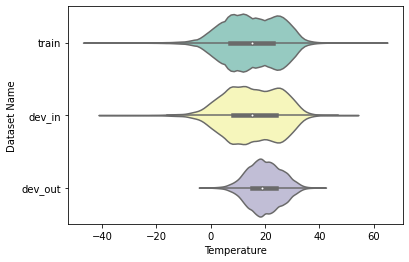

<Figure size 432x288 with 0 Axes>

In [ ]:
# Violin Plot
visualize_temperatures(df_list, df_names, plot_type='violin')

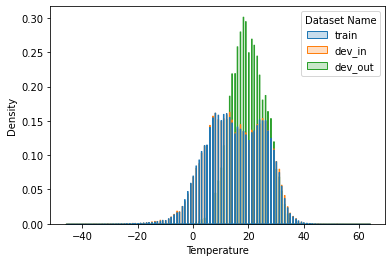

<Figure size 432x288 with 0 Axes>

In [ ]:
# Histogram
visualize_temperatures(df_list, df_names, plot_type='histogram')

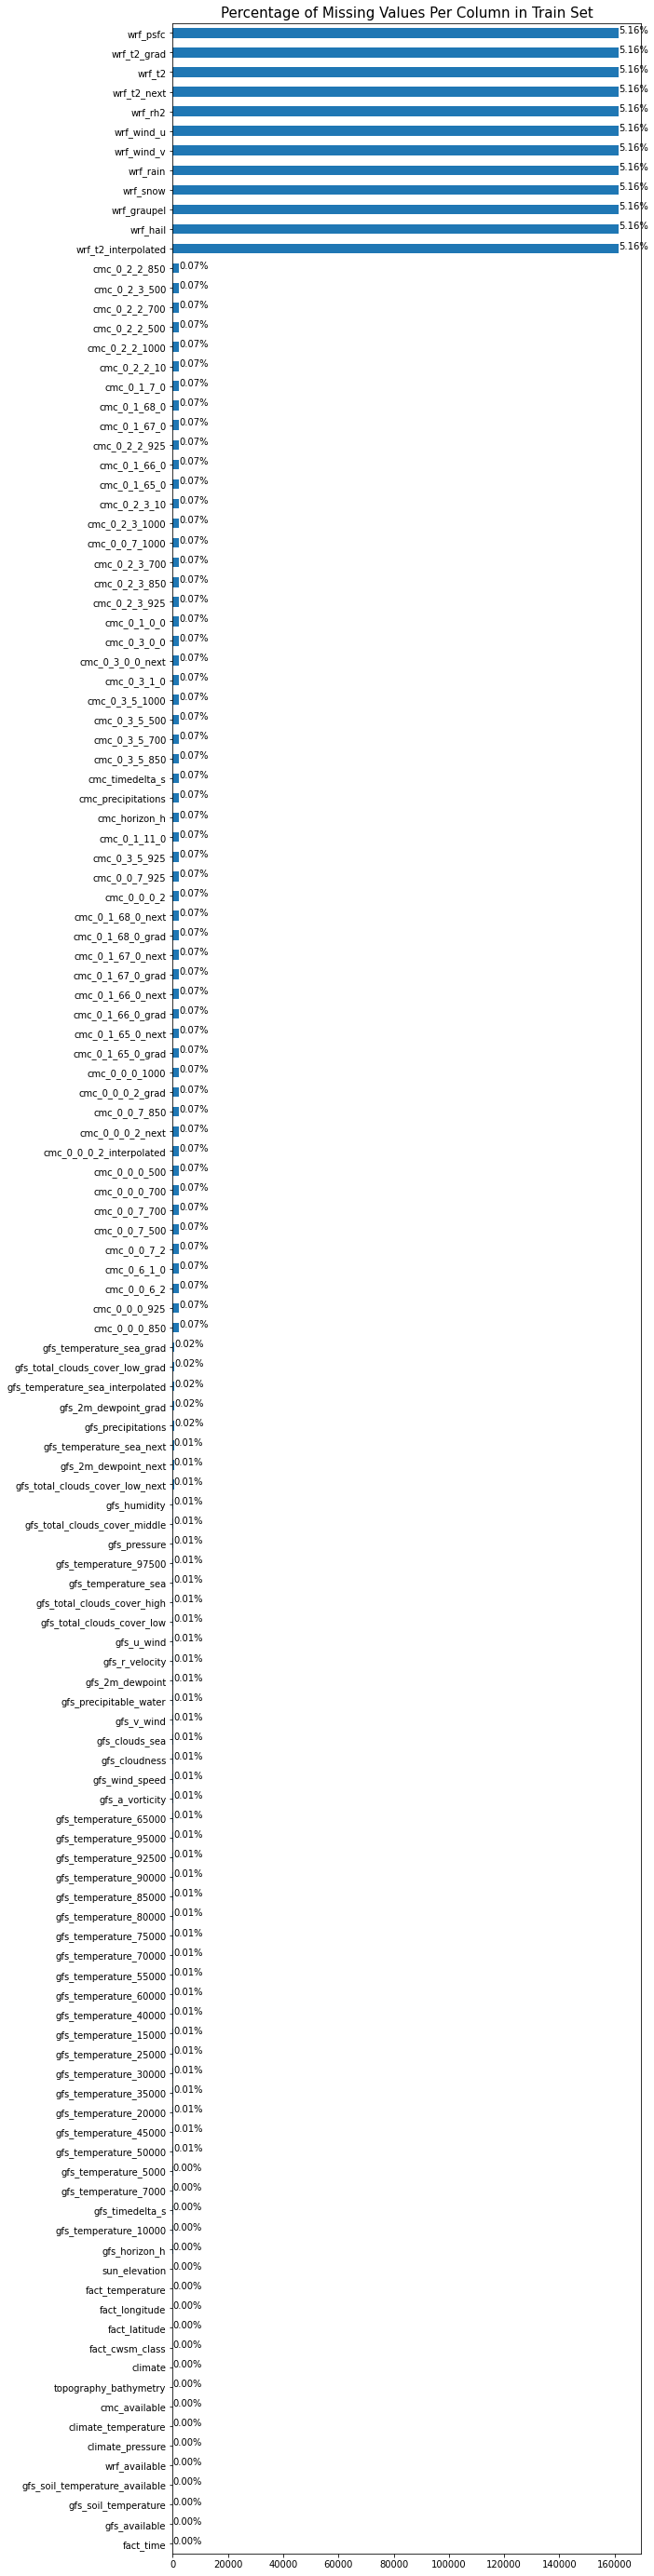

In [ ]:
# Check if there any missing values in train set
ax = df_train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 50))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.2f}%'.format((p.get_width()/df_train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

#3)Data Preprocessing 1



3.1)Data reduction - Dropped 5 columns.

In [ ]:
#form train data
train.drop(columns=['wrf_hail'],inplace=True)
train.drop(['cmc_available','gfs_available','gfs_soil_temperature_available','wrf_available'],axis='columns', inplace=True)

#form dev_in data
dev_in.drop(columns=['wrf_hail'],inplace=True)
dev_in.drop(['cmc_available','gfs_available','gfs_soil_temperature_available','wrf_available'],axis='columns', inplace=True)

#form dev_out data
dev_out.drop(columns=['wrf_hail'],inplace=True)
dev_out.drop(['cmc_available','gfs_available','gfs_soil_temperature_available','wrf_available'],axis='columns', inplace=True)



3.2)Filling missing values with mean of the column.

In [ ]:
#replacing the -9999 value with NaN in 'gfs_soil_temperature' column  
train["gfs_soil_temperature"].replace(-9999,np.nan, inplace=True)
dev_in["gfs_soil_temperature"].replace(-9999,np.nan, inplace=True)
dev_out["gfs_soil_temperature"].replace(-9999,np.nan, inplace=True)


#train data
for column in train.columns:
    mean_value2=train[column].mean()
    train[column].fillna(value=mean_value2,inplace=True)
    print("updated",column)

#dev_in data
for column in dev_in.columns:
    mean_value=dev_in[column].mean()
    dev_in[column].fillna(value=mean_value,inplace=True)
    print("updated",column)

#dev_out data
for column in dev_out.columns:
    mean_value3=dev_out[column].mean()
    dev_out[column].fillna(value=mean_value2,inplace=True)
    print("updated",column)

3.3)Data Transformation - Converted celsius scale values to kelvin scale.


In [ ]:
list=['climate_temperature','gfs_2m_dewpoint','gfs_2m_dewpoint_grad','gfs_2m_dewpoint_next','gfs_soil_temperature','gfs_temperature_10000','gfs_temperature_15000','gfs_temperature_20000','gfs_temperature_25000','gfs_temperature_30000','gfs_temperature_35000','gfs_temperature_40000','gfs_temperature_45000','gfs_temperature_5000','gfs_temperature_50000','gfs_temperature_55000','gfs_temperature_60000','gfs_temperature_65000','gfs_temperature_7000','gfs_temperature_70000','gfs_temperature_75000','gfs_temperature_80000','gfs_temperature_85000','gfs_temperature_90000','gfs_temperature_92500','gfs_temperature_95000','gfs_temperature_97500','gfs_temperature_sea','gfs_temperature_sea_grad','gfs_temperature_sea_interpolated','gfs_temperature_sea_next']
dev_in[list] = dev_in.apply(lambda x:x[list]+273.15,axis=1)
dev_out[list] = dev_out.apply(lambda x:x[list]+273.15,axis=1)
train[list] = train.apply(lambda x:x[list]+273.15,axis=1)

3.4)Saving the preprocessed dataset and using them in further execution

In [ ]:
#saving preprocessed data
dev_in.to_csv('df_dev_in.csv', header=True, index=False)
dev_out.to_csv('df_dev_out.csv', header=True, index=False)
train.to_csv('df_train.csv', header=True, index=False)

#4) Model building ( Preprocesing Data 1 ) 


### 4.1) CatBoostRegressor 

### Training

Here we have used the `CatBoostRegressor` as the model.
- An ensemble of models are trained.
- It is important to use `RMSEWithUncertainty` as the loss function during training time in order to be able to calculate uncertainty measures during inference.
- The models are trained using `train` and the hyperparameters should be finetuned using `dev_in` and `dev_out`.

In [ ]:
# Extract features and targets, and remove redundant meta-data
X_train = train.iloc[:,6:]
X_dev_in = dev_in.iloc[:,6:]
y_train = train['fact_temperature']
y_dev_in = dev_in['fact_temperature']

In [ ]:
#install catboost
!pip install catboost
# Set training hyperparameters (note these are dummy hyperparameters - you will need to select your own)
ensemble_size = 10
depth = 8
iterations = 2000
learning_rate = 0.03

In [ ]:
# Train ensemble of models

import catboost

trained_models = []
for seed in range(ensemble_size):
    
    model = catboost.CatBoostRegressor(
        learning_rate = learning_rate,
        iterations = iterations,
        depth = depth,
        loss_function = 'RMSEWithUncertainty',
        eval_metric = 'RMSE',
        random_seed = seed)
    
    print(f'\n Model index: {seed}\n')
    
    model.fit(
        X_train,
        y_train,
        verbose = 100,
        eval_set = (X_dev_in, y_dev_in))
    
    trained_models.append(model)
    model.save_model(f'{dir_path}/CBmodeldma{seed+1}.cbm')


 Model index: 0

0:	learn: 7.5816390	test: 7.5775317	best: 7.5775317 (0)	total: 4.97s	remaining: 2h 45m 33s
100:	learn: 2.0369210	test: 2.0400344	best: 2.0400344 (100)	total: 7m 20s	remaining: 2h 17m 57s
200:	learn: 1.9550967	test: 1.9630784	best: 1.9630784 (200)	total: 14m 34s	remaining: 2h 10m 29s
300:	learn: 1.9072312	test: 1.9196332	best: 1.9196332 (300)	total: 21m 57s	remaining: 2h 3m 57s
400:	learn: 1.8700040	test: 1.8872810	best: 1.8872810 (400)	total: 29m 19s	remaining: 1h 56m 56s
500:	learn: 1.8403260	test: 1.8633876	best: 1.8633876 (500)	total: 36m 44s	remaining: 1h 49m 56s
600:	learn: 1.8154601	test: 1.8449059	best: 1.8449059 (600)	total: 44m 4s	remaining: 1h 42m 35s
700:	learn: 1.7942458	test: 1.8291767	best: 1.8291767 (700)	total: 51m 24s	remaining: 1h 35m 16s
800:	learn: 1.7751987	test: 1.8156543	best: 1.8156543 (800)	total: 58m 48s	remaining: 1h 28m 1s
900:	learn: 1.7586345	test: 1.8050825	best: 1.8050825 (900)	total: 1h 6m 16s	remaining: 1h 20m 50s
1000:	learn: 1.74392

In [ ]:
baseline_models = []

# 10 models trained above cell


model = catboost.CatBoostRegressor()
model.load_model(f'{dir_path}/CBmodel1.cbm')
baseline_models.append(model)
model = catboost.CatBoostRegressor()
model.load_model(f'{dir_path}/CBmodel2.cbm')
baseline_models.append(model)
model = catboost.CatBoostRegressor()
model.load_model(f'{dir_path}/CBmodel3.cbm')
baseline_models.append(model)
model = catboost.CatBoostRegressor()
model.load_model(f'{dir_path}/CBmodel4.cbm')
baseline_models.append(model)
model = catboost.CatBoostRegressor()
model.load_model(f'{dir_path}/CBmodel5.cbm')
baseline_models.append(model)
model = catboost.CatBoostRegressor()
model.load_model(f'{dir_path}/CBmodel6.cbm')
baseline_models.append(model)
model = catboost.CatBoostRegressor()
model.load_model(f'{dir_path}/CBmodel7.cbm')
baseline_models.append(model)
model = catboost.CatBoostRegressor()
model.load_model(f'{dir_path}/CBmodel8.cbm')
baseline_models.append(model)
model = catboost.CatBoostRegressor()
model.load_model(f'{dir_path}/CBmodel9.cbm')
baseline_models.append(model)

In [ ]:
# Get ensemble of predictions for each data point
import numpy as np

def get_predictions(features_df, model):
    '''
    Calculates predictions on df features for specified model
    
    Return: array [num_samples x 2],
        where
            num_samples = number of rows in features_df
            2 = [mean, variance]
    
    '''
    return model.predict(features_df)


def get_all_predictions(features_df, models_list):
    '''
    Return: array [ensemble_size x num_samples x 2],
        where
            ensemble_size = number of models in models_list
            num_samples = number of rows in features_df
            2 = [mean, variance]
    '''
    all_preds = []
    for model in models_list:
        preds = np.asarray(get_predictions(features_df, model))
        all_preds.append(preds)
    return np.stack(all_preds, axis=0)


all_preds = get_all_predictions(X_dev, baseline_models)

In [ ]:
# Predict on test set
# test set RMSE
from sklearn.metrics import mean_squared_error as MSE
test_rmse = MSE(y_dev, preds) ** (1 / 2)
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))

RMSE test set: 2.15


In [ ]:

# Choose any uncertainty measure to calculate uncertainty scores
# This tutorial uses total variance as the uncertainty measure

from uncertainty import ensemble_uncertainties_regression

all_uncertainty = ensemble_uncertainties_regression(all_preds)
uncertainties = all_uncertainty['tvar']

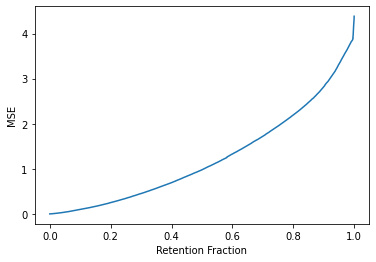

<Figure size 432x288 with 0 Axes>

In [ ]:
# 9 ensemble MSE retention curve
from assessment import calc_uncertainty_regection_curve
import matplotlib.pyplot as plt

# MSE retention values
rejection_mse = calc_uncertainty_regection_curve(errors, uncertainties)
retention_mse = rejection_mse[::-1]

retention_fractions = np.linspace(0,1,len(retention_mse))

# plot
plt.plot(retention_fractions, retention_mse)
plt.ylabel('MSE')
plt.xlabel("Retention Fraction")
plt.show()
plt.clf()

F1 score at 95% retention:  0.635693874178696


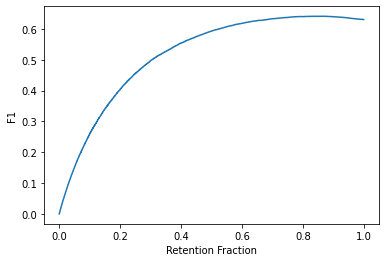

<Figure size 432x288 with 0 Axes>

In [ ]:
# 9 ensemble F1-score retention curve
from assessment import f_beta_metrics

# Use an acceptable error threshold of 1 degree
thresh = 1.0

# Get all metrics
f_auc, f95, retention_f1 = f_beta_metrics(errors, uncertainties, thresh, beta=1.0)
print("F1 score at 95% retention: ", f95)

retention_fractions = np.linspace(0,1,len(retention_f1))

# plot
plt.plot(retention_fractions, retention_f1)
plt.ylabel('F1')
plt.xlabel("Retention Fraction")
plt.show()
plt.clf()

In [ ]:
# Get ensemble predictions
all_preds_mean = all_preds[:,:,0]
avg_preds = np.squeeze(np.mean(all_preds_mean, axis=0))

# Get target values
targets = np.asarray(df_dev['fact_temperature'])

# squared error
errors = (avg_preds - targets) ** 2

In [ ]:
#9
# Prepare the ids
ids = np.arange(1, len(df_dev) + 1)

# Predictions are the mean predictions across the ensemble of models
preds = np.mean(all_preds[:,:,0], axis=0)

# The uncertainties have been calculated in the previous step

# Store all the information to be submitted in a df
df_submission = pd.DataFrame(data={
        'ID' : ids,
        'PRED' : preds,
        'UNCERTAINTY' : uncertainties
        })

df_submission.head()

,ID,PRED,UNCERTAINTY
0,1,9.917762,1.566056
1,2,4.083052,1.698572
2,3,25.257063,1.441561
3,4,4.376450,2.058515
4,5,13.986514,2.665086


In [ ]:
# 9 Save as csv
out_file = '/content/drive/MyDrive/submissions/df_submission_9_ensemble.csv'
df_submission.to_csv(out_file, index=False)

###4.2) Lasso Regression

In [ ]:
# Extract features and targets, and remove redundant meta-data
X_train = train.iloc[:,6:]
X_dev_in = dev_in.iloc[:,6:]
y_train = train['fact_temperature']
y_dev_in = dev_in['fact_temperature']

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8080742.378655997, tolerance: 33273.20394143507
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
pred_y = clf.predict(X_dev_in)
# test set RMSE
test_rmse = MSE(y_dev_in, pred_y) ** (1 / 2)
  
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))

RMSE test set: 2.24


RMSE for Lasso Regression: 2.24

###4.3) Elastic net Regression

In [ ]:
# Extract features and targets, and remove redundant meta-data
X_train = train.iloc[:,6:]
X_dev_in = dev_in.iloc[:,6:]
y_train = train['fact_temperature']
y_dev_in = dev_in['fact_temperature']

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

reg = ExtraTreesRegressor(n_estimators=100, random_state=0)
reg.fit(X_train, y_train)

from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

pred_y = regr.predict(X_dev_in)from sklearn.metrics import mean_squared_error as MSE
# test set RMSE
test_rmse = MSE(y_dev_in, pred_y) ** (1 / 2)
  
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))

#output RMSE test set: 11.73

RMSE for Elastic net Regression: 11.73

###4.3) Ridge Regressor

In [ ]:
reg = linear_model.Ridge(alpha=500)
reg.fit(df_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[-3.14700399e-03  1.04370062e-02  3.43928269e-02  2.46875499e-03
  1.11981780e-01  5.96173867e-02  4.75189034e-01 -5.47877420e-02
 -1.14405131e-01  5.84478943e-04 -6.64817003e-03 -5.28045754e-03
  5.37304601e-02  1.62880621e-02 -4.58209883e-02  5.87778530e-02
 -2.12730753e-05  4.19155493e-03  9.68717468e-04 -3.54958923e-03
 -6.19081730e-01 -2.52443818e-01 -1.11522283e-03  3.32877313e-02
 -4.15401805e-02 -7.62253561e-03  1.16125860e-02 -3.20296366e-03
 -3.52050815e-03 -6.12582249e-03  5.81440489e-04 -6.97630348e-04
  4.59516624e-03  8.87046205e-02 -4.16998241e-02  8.99898167e-04
  9.18080599e-04 -1.57425291e-02 -1.69266200e-02  8.22317073e-04
 -1.02377507e-03 -5.09524444e-04  2.94788023e-03 -1.89392501e-03
 -4.91707061e-03  7.06503423e-03  7.20958747e-03  5.61504858e-04
  3.34505459e-04  2.04749311e-02  9.68888355e-05 -3.95273856e-02
 -4.21441056e-02 -9.40715077e-05  2.28643609e-05  8.02593080e-04
  3.40322995e-02  1.09529387e-03 -6.11635266e-02 -2.48345751e-02
  1.65763166e-01 -2.57785

In [ ]:
# Predict on test set
pred_y = reg.predict(df_dev_in)
print(pred_y)
# test set RMSE
test_rmse = MSE(y_dev, pred_y) ** (1 / 2)
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))

[12.29621889  4.32361761 23.08505664 ... 17.88283932 26.03285738
 10.96724464]
RMSE test set: 14.24


RMSE for RigdeRegressor : **14.24**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AttributeError: ignored

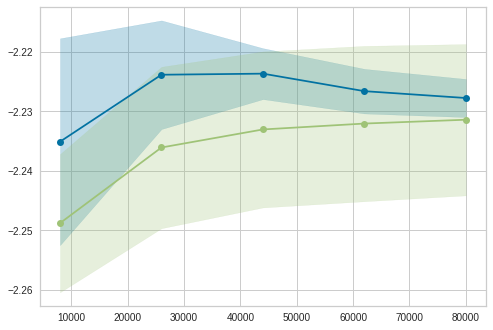

In [ ]:
# Plot learning curves
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(reg, scoring='neg_root_mean_squared_error')
visualizer.fit(df_train, y_train)
visualizer.show()


###4.4) HistGradientBoostRegressor

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
ensemble_size = 10
trained_models = []
for seed in range(ensemble_size):
    model = HistGradientBoostingRegressor(
        loss='squared_error', learning_rate=0.1, max_iter=100, max_depth=8)
    
    print(f'\n Model index: {seed}\n')
    
    model.fit(
        df_train,
        y_train
        )
    
    trained_models.append(model)

In [ ]:
# Predict on test set
pred_y = trained_models[4].predict(df_dev_in)
# test set RMSE
test_rmse = MSE(y_dev, pred_y) ** (1 / 2)
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))

In [ ]:
# Get ensemble of predictions for each data point

import numpy as np

def get_predictions(features_df, model):
    '''
    Calculates predictions on df features for specified model
    
    Return: array [num_samples x 2],
        where
            num_samples = number of rows in features_df
            2 = [mean, variance]
    
    '''
    return model.predict(features_df)


def get_all_predictions(features_df, models_list):
    '''
    Return: array [ensemble_size x num_samples x 2],
        where
            ensemble_size = number of models in models_list
            num_samples = number of rows in features_df
            2 = [mean, variance]
    '''
    all_preds = []
    for model in models_list:
        preds = np.asarray(get_predictions(features_df, model))
        all_preds.append(preds)
    return np.stack(all_preds, axis=0)


all_preds = get_all_predictions(df_dev_in, trained_models)

In [ ]:
uncertainties = np.var(all_preds[:, :], axis=0)

In [ ]:
# Get ensemble predictions
all_preds_mean = all_preds[:,:]
avg_preds = np.squeeze(np.mean(all_preds_mean, axis=0))

# Get target values
targets = np.asarray(y_dev)

# squared error
errors = (avg_preds - targets) ** 2

In [ ]:
# MSE retention curve
from assessment import calc_uncertainty_regection_curve
import matplotlib.pyplot as plt

# MSE retention values
rejection_mse = calc_uncertainty_regection_curve(errors, uncertainties)
retention_mse = rejection_mse[::-1]

retention_fractions = np.linspace(0,1,len(retention_mse))

# plot
plt.plot(retention_fractions, retention_mse)
plt.ylabel('MSE')
plt.xlabel("Retention Fraction")
plt.show()
plt.clf()

In [ ]:
# F1-score retention curve
from assessment import f_beta_metrics

# Use an acceptable error threshold of 1 degree
thresh = 1.0

# Get all metrics
f_auc, f95, retention_f1 = f_beta_metrics(errors, uncertainties, thresh, beta=1.0)
print("F1 score at 95% retention: ", f95)

retention_fractions = np.linspace(0,1,len(retention_f1))

# plot
plt.plot(retention_fractions, retention_f1)
plt.ylabel('F1')
plt.xlabel("Retention Fraction")
plt.show()
plt.clf()

In [ ]:
# Prepare the ids
ids = np.arange(1, len(df_dev_in) + 1)

# Predictions are the mean predictions across the ensemble of models
preds = np.mean(all_preds[:,:], axis=0)

# The uncertainties have been calculated in the previous step

# Store all the information to be submitted in a df
df_submission = pd.DataFrame(data={
        'ID' : ids,
        'PRED' : preds,
        'UNCERTAINTY' : uncertainties
        })

df_submission.head()

#5)Data Preprocessing 2


###5.1)Normalization the datasets

In [ ]:
X_train_norm = train.copy()
X_dev_in_norm = dev_in.copy()
X_dev_out_norm = dev_out.copy()

X_train_norm.drop(['climate','fact_temperature'], axis = 1 ,inplace=True )
X_dev_in_norm.drop(['climate','fact_temperature'], axis = 1 ,inplace=True )
X_dev_out_norm.drop(['climate','fact_temperature'], axis = 1 ,inplace=True )

In [ ]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
X_train_norm = z_score(X_train_norm)
X_dev_in_norm = z_score(X_dev_in_norm)
X_dev_out_norm = z_score(X_dev_out_norm)

In [ ]:
X_train_norm.insert(loc=3, column='fact_temperature', value = df_train['fact_temperature'])
X_dev_in_norm.insert(loc=3, column='fact_temperature', value = df_dev_in['fact_temperature'])
X_dev_out_norm.insert(loc=3, column='fact_temperature', value = df_dev_out['fact_temperature'])

X_train_norm.insert(loc=5, column='climate', value = df_train['climate'])
X_dev_in_norm.insert(loc=5, column='climate', value = df_dev_in['climate'])
X_dev_out_norm.insert(loc=5, column='climate', value = df_dev_out['climate'])

In [ ]:
# saving the dataframe
X_train_norm.to_csv(r'/content/drive/MyDrive/normalized/df_train5.csv', index=False)
X_dev_in_norm.to_csv(r'/content/drive/MyDrive/normalized/df_dev_in5.csv', index=False)
X_dev_out_norm.to_csv(r'/content/drive/MyDrive/normalized/df_dev_out5.csv', index=False)



#6) Model building ( Preprocesing Data 2 ) 

### 6.1)Catboost Regressor

In [ ]:
# Set training hyperparameters (note these are dummy hyperparameters - you will need to select your own)
ensemble_size = 1
depth = 8
iterations = 500
learning_rate = 0.3

In [ ]:
# Train ensemble of models

import catboost

trained_models = []
for seed in range(ensemble_size):
    
    model = catboost.CatBoostRegressor(
        learning_rate = learning_rate,
        iterations = iterations,
        depth = depth,
        loss_function = 'RMSEWithUncertainty',
        eval_metric = 'RMSE',
        random_seed = seed)
    
    print(f'\n Model index: {seed}\n')
    
    model.fit(
        X_train,
        y_train,
        verbose = 100,
        eval_set = (X_dev_in, y_dev_in))
    
    trained_models.append(model)


In [ ]:
# Predict on test set
from sklearn.metrics import mean_squared_error as MSE

pred_y = trained_models[0].predict(X_dev)
# test set RMSE
test_rmse = MSE(y_dev, pred_y[:,0:1]) ** (1 / 2)
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))

RMSE test set: 4.35


###6.2) Ridge Regressor

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
df_dev_in = pd.read_csv('/content/drive/MyDrive/normalized/df_dev_in5.csv')
df_dev_out = pd.read_csv('/content/drive/MyDrive/normalized/df_dev_out5.csv')
df_train = pd.read_csv('/content/drive/MyDrive/normalized/df_train5.csv')

In [ ]:
reg = linear_model.Ridge(alpha=0.01)
reg.fit(df_train, y_train)
print(reg.coef_)
print(reg.intercept_)


[-1.60087134e+00  3.92940637e-01  3.28422229e-01  8.91321884e-02
  8.94682101e-01  2.35874292e-01  5.01084361e+00 -7.49892177e-01
 -8.22329810e-01  5.95754065e-03 -6.92258045e-02 -1.82138347e-01
  2.45689174e-01  2.71031159e-01 -1.78464945e-01  1.88206133e-01
  2.87266182e-03  5.05385616e-02  2.02698240e-02  7.00490386e-03
 -2.31775918e-01 -5.39870419e-02  1.51298684e-01  2.20084259e-02
  1.07207723e-02  3.94961027e-03  2.52912873e-02 -2.76447136e-02
 -3.91095044e-03 -7.95667565e-02 -2.35647221e-03 -1.26864228e-02
  3.84629092e-02  2.50209849e-01 -1.44919611e-01  5.94235439e-03
  8.78664873e-03 -9.02608497e-02 -9.07469254e-02  4.73117856e+00
 -5.90221077e+00 -2.80624632e-01 -3.42876925e-01 -3.32861007e-01
 -3.77443500e-01  8.63505192e-01  3.43937164e-01  1.45846869e-02
  9.91347720e-03  2.32294478e+00  2.80249977e-01 -4.52265348e-01
 -9.47309571e-02 -8.23362851e-02  2.58417846e-03  1.20974070e-02
  7.29972899e-01  8.34569548e-02 -3.27491892e-02 -1.14817200e+00
  4.48735204e-02 -8.57360

In [ ]:
# Predict on test set
pred_y = reg.predict(df_dev_in)
# test set RMSE
test_rmse = MSE(y_dev, pred_y) ** (1 / 2)
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))

RMSE test set: 4.86


RMSE for RigdeRegressor : **4.86**

###6.3) HistGradientBoost Regressor

In [ ]:
df_dev_in = pd.read_csv('/content/drive/MyDrive/normalized/df_dev_in5.csv')
df_dev_out = pd.read_csv('/content/drive/MyDrive/normalized/df_dev_out5.csv')
df_train = pd.read_csv('/content/drive/MyDrive/normalized/df_train5.csv')

In [ ]:
df_dev_in = pd.concat([df_dev_in, df_dev_out])
y_dev = df_dev_in['fact_temperature']
df_dev_in = df_dev_in.iloc[:,6:]
y_train = df_train['fact_temperature']
df_train = df_train.iloc[:,6:]

In [ ]:
ensemble_size = 10
trained_models = []
for seed in range(ensemble_size):
    model = HistGradientBoostingRegressor(
        loss='squared_error', learning_rate=0.1, max_iter=100, max_depth=8)
    
    print(f'\n Model index: {seed}\n')
    
    model.fit(
        df_train,
        y_train
        )
    
    trained_models.append(model)


 Model index: 0


 Model index: 1


 Model index: 2


 Model index: 3


 Model index: 4


 Model index: 5


 Model index: 6


 Model index: 7


 Model index: 8


 Model index: 9



In [ ]:
# Predict on test set
pred_y = trained_models[8].predict(df_dev_in)
# test set RMSE
test_rmse = MSE(y_dev, pred_y) ** (1 / 2)
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))

RMSE test set: 3.85


In [ ]:
# Get ensemble of predictions for each data point

import numpy as np

def get_predictions(features_df, model):
    '''
    Calculates predictions on df features for specified model
    
    Return: array [num_samples x 2],
        where
            num_samples = number of rows in features_df
            2 = [mean, variance]
    
    '''
    return model.predict(features_df)


def get_all_predictions(features_df, models_list):
    '''
    Return: array [ensemble_size x num_samples x 2],
        where
            ensemble_size = number of models in models_list
            num_samples = number of rows in features_df
            2 = [mean, variance]
    '''
    all_preds = []
    for model in models_list:
        preds = np.asarray(get_predictions(features_df, model))
        all_preds.append(preds)
    return np.stack(all_preds, axis=0)


all_preds = get_all_predictions(df_dev_in, trained_models)

In [ ]:
uncertainties = np.var(all_preds[:, :], axis=0)

In [ ]:
# Get ensemble predictions
all_preds_mean = all_preds[:,:]
avg_preds = np.squeeze(np.mean(all_preds_mean, axis=0))

# Get target values
targets = np.asarray(y_dev)

# squared error
errors = (avg_preds - targets) ** 2

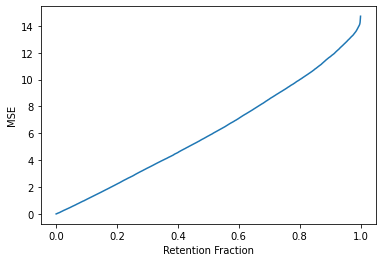

<Figure size 432x288 with 0 Axes>

In [ ]:
# MSE retention curve
from assessment import calc_uncertainty_regection_curve
import matplotlib.pyplot as plt

# MSE retention values
rejection_mse = calc_uncertainty_regection_curve(errors, uncertainties)
retention_mse = rejection_mse[::-1]

retention_fractions = np.linspace(0,1,len(retention_mse))

# plot
plt.plot(retention_fractions, retention_mse)
plt.ylabel('MSE')
plt.xlabel("Retention Fraction")
plt.show()
plt.clf()

F1 score at 95% retention:  0.4160329321181086


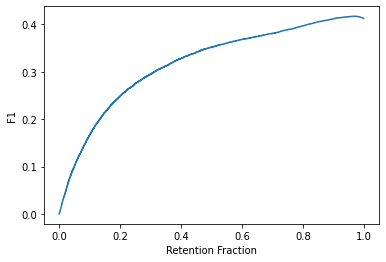

<Figure size 432x288 with 0 Axes>

In [ ]:
# F1-score retention curve
from assessment import f_beta_metrics

# Use an acceptable error threshold of 1 degree
thresh = 1.0

# Get all metrics
f_auc, f95, retention_f1 = f_beta_metrics(errors, uncertainties, thresh, beta=1.0)
print("F1 score at 95% retention: ", f95)

retention_fractions = np.linspace(0,1,len(retention_f1))

# plot
plt.plot(retention_fractions, retention_f1)
plt.ylabel('F1')
plt.xlabel("Retention Fraction")
plt.show()
plt.clf()

In [ ]:
# Prepare the ids
ids = np.arange(1, len(df_dev_in) + 1)

# Predictions are the mean predictions across the ensemble of models
preds = np.mean(all_preds[:,:], axis=0)

# The uncertainties have been calculated in the previous step

# Store all the information to be submitted in a df
df_submission = pd.DataFrame(data={
        'ID' : ids,
        'PRED' : preds,
        'UNCERTAINTY' : uncertainties
        })

df_submission.head()

,ID,PRED,UNCERTAINTY
0,1,11.040325,0.057258
1,2,4.830107,0.018564
2,3,24.549261,0.107247
3,4,5.011156,0.104903
4,5,14.706642,0.024319
